# CREATE DATASET

## import data and processing

In [31]:
import scipy.io as scio
base = scio.loadmat('ndata.mat')
x,y = base['orgin'].transpose(),base['result'][:,1]

In [32]:
xmin,xmax = x.min(),x.max()
x=(x-xmin)/(xmax-xmin)

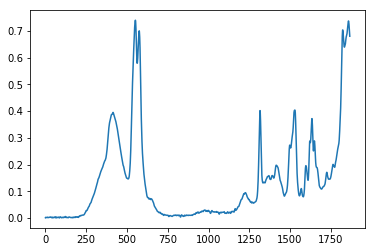

In [33]:
import matplotlib.pyplot as plt
plt.plot(x[2,:])
plt.show()

In [34]:
ymin,ymax = y.min(axis=0),y.max(axis=0)
y =  (y-ymin)/(ymax-ymin)

In [35]:
x_train,y_train,x_test,y_test = x[:30],y[:30],x[30:],y[30:]

# BUILD MODEL FUNCTION

## define a model set
* Function to create model, required for KerasClassifier

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adagrad

In [37]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(1024,input_shape=(1867,),activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    # compile model    
    adam = Adagrad(lr=0.001, epsilon=1e-08, decay=0.0)
    model.compile(loss='mean_squared_error',optimizer=adam)
    return model

# GRID SEARCH

In [38]:
from keras.wrappers.scikit_learn import KerasRegressor

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
model = KerasRegressor(build_fn=create_model, verbose=0)

In [41]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

In [42]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [43]:
grid_result = grid.fit(x_train, y_train)

C:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


## summary result

In [44]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.349861 using {'batch_size': 100, 'epochs': 10}
0.017261 (0.007126) with: {'batch_size': 10, 'epochs': 10}
0.014184 (0.009844) with: {'batch_size': 10, 'epochs': 50}
0.007114 (0.004524) with: {'batch_size': 10, 'epochs': 100}
0.332989 (0.015858) with: {'batch_size': 20, 'epochs': 10}
0.030860 (0.022224) with: {'batch_size': 20, 'epochs': 50}
0.008326 (0.004675) with: {'batch_size': 20, 'epochs': 100}
0.322069 (0.087385) with: {'batch_size': 40, 'epochs': 10}
0.025033 (0.024693) with: {'batch_size': 40, 'epochs': 50}
0.006085 (0.004696) with: {'batch_size': 40, 'epochs': 100}
0.327821 (0.054674) with: {'batch_size': 60, 'epochs': 10}
0.034704 (0.038329) with: {'batch_size': 60, 'epochs': 50}
0.008292 (0.004556) with: {'batch_size': 60, 'epochs': 100}
0.167310 (0.068814) with: {'batch_size': 80, 'epochs': 10}
0.018273 (0.014714) with: {'batch_size': 80, 'epochs': 50}
0.006145 (0.004328) with: {'batch_size': 80, 'epochs': 100}
0.349861 (0.023410) with: {'batch_size': 100, 'epochs':

In [45]:
from sklearn.metrics import r2_score
y_train_true,y_train_pred = y_train,grid.predict(x_train)
y_test_true, y_test_pred  = y_test, grid.predict(x_test)
print(' The R2 of test dataset is %0.3f\n The R2 of train dataset is %0.3f'%(r2_score(y_test_true, y_test_pred),
      r2_score(y_train_true,y_train_pred)))

C:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


 The R2 of test dataset is -11.521
 The R2 of train dataset is -2.912


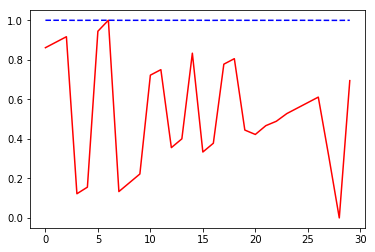

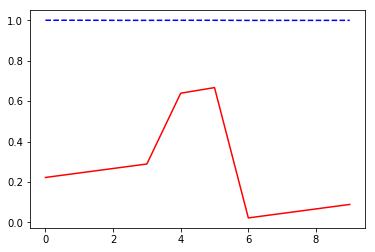

In [46]:
import numpy as np
import matplotlib.pyplot as plt
train_numb,test_numb = len(y_train_true),len(y_test_pred)
plt.plot(np.arange(train_numb),y_train_true,'r-',
        np.arange(train_numb), y_train_pred,'b--')
plt.show()
plt.plot(np.arange(test_numb),y_test_true,'r-',
        np.arange(test_numb), y_test_pred,'b--')
plt.show()